In [204]:
import optuna
import os 

import optuna.visualization as visualize
#import optuna.visualization.matplotlib as visualize
#refer to https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/005_visualization.html#sphx-glr-tutorial-10-key-features-005-visualization-py 
#for how to plot stuff 


study = optuna.create_study()
db_dir = "./ckpt_trash/optuna.db"

url = "sqlite:///" + db_dir #os.path.abspath(os.path.join(os.getcwd(), db_dir)) #이건 왜 그런지 abs path로 안줘서 (그렇게 하려고 해도), 안되무!! 
storage = optuna.storages.RDBStorage(
    url = url,
    heartbeat_interval = 60, 
    grace_period = 120    
)
study = optuna.load_study(study_name = "test_study_name", 
                                storage = storage)

print(study.best_trial)

print(study.best_trial.value)

    
visualize.plot_optimization_history(study)#, )
#visualize.plot_intermediate_values(study)#,params

[I 2023-03-22 08:56:34,503] A new study created in memory with name: no-name-65a59f8e-bd96-4848-ac06-cffa09d377ef


ValueError: Record does not exist.

[W 2023-03-22 08:56:34,701] Study instance does not contain trials.


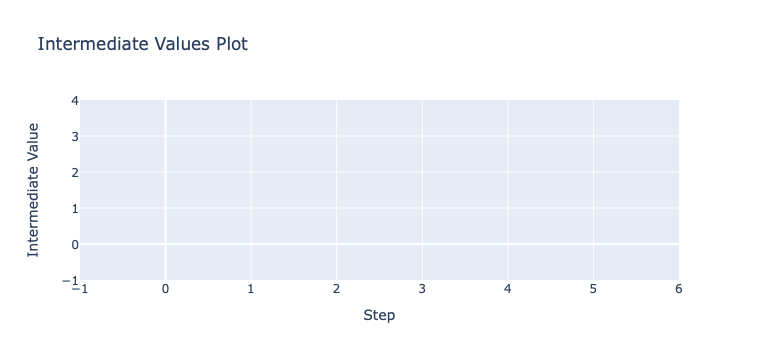

In [205]:
visualize.plot_intermediate_values(study)

# Fixing RBF Scaling and Gamma and Sigma

```
(Pdb) meta_data.age.mean()
56.52865657681324
(Pdb) meta_data.age.std()
8.09518979132575

```

In [218]:
5/(8.09518979132575)

0.6176507443170335

In [216]:
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pyplot as plt 
import numpy as np 

In [217]:
sigma = 5
x = np.linspace(50, 100,num=100).reshape(100,1)


gamma = 1./(2*sigma**2)
y_1 = rbf_kernel(x,np.ones(x.shape)*x.mean(),gamma = gamma)
y_2 = rbf_kernel(x,np.ones(x.shape)*x.mean(),gamma = 0.1*gamma)
y_3 = rbf_kernel(x,np.ones(x.shape)*x.mean(),gamma = 10*gamma)
y_4 = rbf_kernel(x-5,np.ones(x.shape)*x.mean()-5,gamma = gamma) #shift both x and y by 5 : effect of shifting the age values (translation)


x_norm = (x-x.mean())/x.std()
y_5 = rbf_kernel(x_norm,np.ones(x_norm.shape)*x_norm.mean(),gamma = gamma)


#gamma_norm = gamma*(x.std()**2)

sigma_norm = 5/x.std()
gamma_norm = 1./(2*sigma_norm**2)
y_6 = rbf_kernel(x_norm,np.ones(x_norm.shape)*x_norm.mean(),gamma = gamma_norm)


#rbf = exp -gamma|x-y|^2 이니, (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.rbf_kernel.html)
#-gamma|x-y|^2 = -gamma'|x'-y'|^2로 하면 됨
#since x' = (x-mu)/std (same for y)
#therefore, -gamma'|x'-y'|^2 = -gamma'|(x-y)/std|^2이 된다
#=-gamma'|x-y|^2/(std^2)
#따라서, gamma'  = std^2 *gamma 이다

#따라서, since gamma = 1/(2*sigma**2) => sigma = sqrt(1/(2*gamma))
#therefor,e sigma' = sqrt(1/(2*std^2*gamma)) = 1/std*sigma

#따라서, sigma를 어떻게 바꾸면 될지 정해지ㅐㅁ



##rbf : translation invariant 
#but std variant (upon the gamma value)

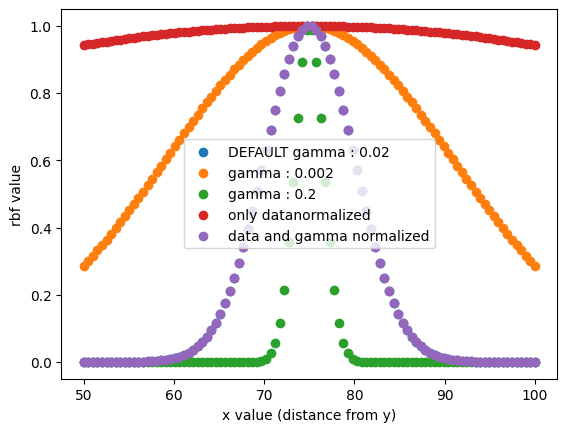

In [209]:
plt.scatter(x,y_1[:,0], label = f"DEFAULT gamma : {gamma}")
plt.scatter(x,y_2[:,0], label = f"gamma : {0.1*gamma}")
plt.scatter(x,y_3[:,0], label = f"gamma : {10*gamma}")
#plt.scatter(x,y_4[:,0], label = f"shift 5, same as expected")
plt.scatter(x,y_5[:,0], label = "only datanormalized")
plt.scatter(x,y_6[:,0], label = "data and gamma normalized")
plt.xlabel("x value (distance from y)")
plt.ylabel("rbf value")
plt.legend()

In [210]:
os.getcwd()

'/scratch/connectome/dyhan316/VAE_ADHD/yAwareContrastiveLearning'

In [211]:
gamma = 1./(2*5**2)
y2 = rbf_kernel(x,np.zeros(x.shape),gamma = 0.05)

Text(0, 0.5, 'rbf value')

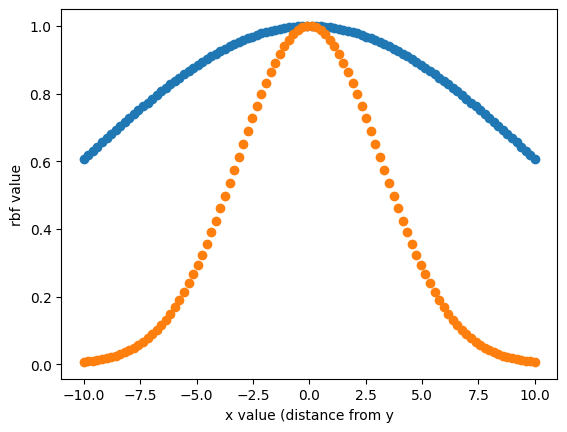

In [84]:
plt.scatter(x,y[:,0])
plt.scatter(x,y2[:,0])
plt.xlabel("x value (distance from y")
plt.ylabel("rbf value")

In [53]:
rbf_kernel(np.zeros((1,1)),np.ones((1,1)),gamma = 0.2)[0,0]

0.8187307530779818

In [ ]:
var